In [1]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninst

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 34.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import glob
import open3d as o3d
import pandas as pd

In [4]:
image_file = ["/content/000031.png"]
pcd_file = f"/content/000031.pcd"
label_file = f"/content/000031_label.txt"
calib_files = ["/content/000031.txt"]  # Add more files as needed
index = 0  # Set the index to the desired file
image = cv2.cvtColor(cv2.imread(image_file[index]), cv2.COLOR_BGR2RGB)

In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 239MB/s]


In [7]:
results = model('/content/000031.png', save=True)  # Saves annotated image


image 1/1 /content/000031.png: 224x640 5 cars, 1 truck, 110.2ms
Speed: 9.1ms preprocess, 110.2ms inference, 868.8ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict


In [8]:
results = model.predict('/content/000031.png', save=True)


image 1/1 /content/000031.png: 224x640 5 cars, 1 truck, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict


In [9]:
result = results[0]

In [10]:
annotated_image = result.plot()

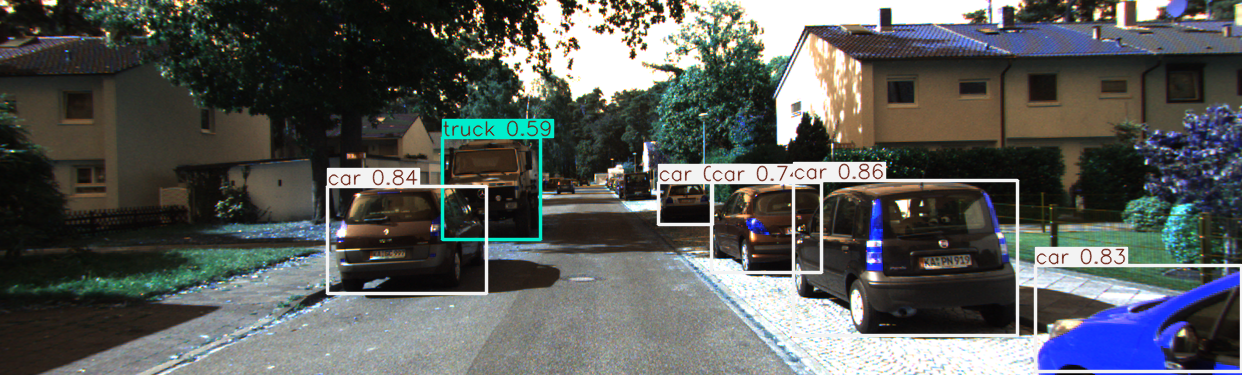

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [12]:
cloud = o3d.io.read_point_cloud(pcd_file)
points = np.asarray(cloud.points)

In [13]:
def read_single_label(label_filename):
    """Reads the label file for a single image and extracts 3D object data."""
    with open(label_filename, 'r') as file:
        lines = [line.rstrip() for line in file]
        objects = [Object3d(line) for line in lines if line.split(" ")[0] != "DontCare"]
    return objects

In [14]:

class Object3d(object):
    """Represents a single 3D object detected in a scene."""
    def __init__(self, label_file_line):
        data = label_file_line.split(" ")
        data[1:] = [float(x) for x in data[1:]]

        # Extract 3D bounding box information
        self.h = data[8]  # Box height
        self.w = data[9]  # Box width
        self.l = data[10]  # Box length (in meters)
        self.t = (data[11], data[12], data[13])  # Location (x, y, z) in camera coordinates
        self.ry = data[14]  # Yaw angle (around Y-axis in camera coordinates) [-pi..pi]

        # Initialize 2D and 3D bounding box placeholders
        self.xmin = 0
        self.xmax = 0
        self.ymin = 0
        self.ymax = 0
        self.bbox2d = np.zeros(shape=(2, 2))
        self.bbox3d = np.zeros(shape=(4, 2))

In [15]:
# Replace with the actual path to your label file
label_file_path = "/content/000031_label.txt"

In [16]:
# Read the label file for the single image
list_of_3d_objects = read_single_label(label_file_path)

# Print the details of each detected object
for obj3d in list_of_3d_objects:
    print("Object Details:")
    print(f"  Lateral Position (X): {obj3d.t[0]} meters")
    print(f"  Height (Y): {obj3d.t[1]} meters")
    print(f"  Distance (Z): {obj3d.t[2]} meters")
    print(f"  Bounding Box Dimensions (HxWxL): {obj3d.h} x {obj3d.w} x {obj3d.l} meters")
    print(f"  Yaw Angle: {obj3d.ry} radians\n")

Object Details:
  Lateral Position (X): -3.18 meters
  Height (Y): 1.79 meters
  Distance (Z): 12.2 meters
  Bounding Box Dimensions (HxWxL): 1.65 x 1.67 x 3.81 meters
  Yaw Angle: -1.6 radians

Object Details:
  Lateral Position (X): 3.18 meters
  Height (Y): 1.61 meters
  Distance (Z): 8.46 meters
  Bounding Box Dimensions (HxWxL): 1.52 x 1.51 x 3.1 meters
  Yaw Angle: -1.59 radians

Object Details:
  Lateral Position (X): 2.9 meters
  Height (Y): 1.66 meters
  Distance (Z): 13.14 meters
  Bounding Box Dimensions (HxWxL): 1.53 x 1.58 x 3.53 meters
  Yaw Angle: -1.59 radians

Object Details:
  Lateral Position (X): -3.48 meters
  Height (Y): 1.52 meters
  Distance (Z): 22.27 meters
  Bounding Box Dimensions (HxWxL): 2.6 x 2.06 x 5.42 meters
  Yaw Angle: 1.56 radians

Object Details:
  Lateral Position (X): 2.71 meters
  Height (Y): 1.69 meters
  Distance (Z): 26.41 meters
  Bounding Box Dimensions (HxWxL): 1.46 x 1.6 x 3.71 meters
  Yaw Angle: -1.54 radians

Object Details:
  Lateral 

In [17]:
class LiDAR2Camera(object):
    def __init__(self, calib_file):
        self.P = np.reshape(self.read_calib_file(calib_file)["P2"], [3,4])

    def read_calib_file(self, filepath):
        """ Read in a calibration file and parse into a dictionary.
        Ref: https://github.com/utiasSTARS/pykitti/blob/master/pykitti/utils.py
        """
        data = {}
        with open(filepath, "r") as f:
            for line in f.readlines():
                line = line.rstrip()
                if len(line) == 0:
                    continue
                key, value = line.split(":", 1)
                # The only non-float values in these files are dates, which
                # we don't care about anyway
                try:
                    data[key] = np.array([float(x) for x in value.split()])
                except ValueError:
                    pass
        return data

In [18]:
def project_to_image(self, pts_3d):
    """ Project 3d points to image plane.
    """
    # Convert to Homogeneous Coordinates
    n = pts_3d.shape[0]
    pts_3d_extend = np.hstack((pts_3d, np.ones((n, 1))))
    # Multiply with the P Matrix
    pts_2d = np.dot(pts_3d_extend, np.transpose(self.P))  # nx3
    # Convert Back to Cartesian
    pts_2d[:, 0] /= pts_2d[:, 2]
    pts_2d[:, 1] /= pts_2d[:, 2]
    return pts_2d[:, 0:2]

LiDAR2Camera.project_to_image = project_to_image

In [19]:
def roty(t):
    """ Rotation about the y-axis. """
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])

def compute_box_3d(self,obj):
        """ Projects the 3d bounding box into the image plane.
            Returns:
                corners_2d: (8,2) array in left image coord.
                corners_3d: (8,3) array in in rect camera coord.
        """
        # compute rotational matrix around yaw axis
        R = roty(obj.ry)
        # 3d bounding box dimensions
        l = obj.l
        w = obj.w
        h = obj.h

        # 3d bounding box corners
        x_corners = [l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2]
        y_corners = [0, 0, 0, 0, -h, -h, -h, -h]
        z_corners = [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2]

        # rotate and translate 3d bounding box
        #corners_3d = np.vstack([x_corners, y_corners, z_corners])
        corners_3d = np.dot(R, np.vstack([x_corners, y_corners, z_corners]))
        corners_3d[0, :] = corners_3d[0, :] + obj.t[0]
        corners_3d[1, :] = corners_3d[1, :] + obj.t[1]
        corners_3d[2, :] = corners_3d[2, :] + obj.t[2]

        # only draw 3d bounding box for objs in front of the camera
        if np.any(corners_3d[2, :] < 0.1):
            corners_2d = None
            return corners_2d

        # project the 3d bounding box into the image plane
        corners_2d = self.project_to_image(np.transpose(corners_3d))

        return corners_2d

LiDAR2Camera.compute_box_3d = compute_box_3d

In [20]:
def draw_projected_box3d(self,image, qs, color=(255, 0, 0), thickness=2):
        """ Draw 3d bounding box in image
            qs: (8,3) array of vertices for the 3d box in following order:
                1 -------- 0
            /|         /|
            2 -------- 3 .
            | |        | |
            . 5 -------- 4
            |/         |/
            6 -------- 7
        """
        qs = qs.astype(np.int32)
        for k in range(0, 4):
            # Ref: http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
            i, j = k, (k + 1) % 4
            # use LINE_AA for opencv3
            # cv2.line(image, (qs[i,0],qs[i,1]), (qs[j,0],qs[j,1]), color, thickness, cv2.CV_AA)
            cv2.line(image, (qs[i, 0], qs[i, 1]), (qs[j, 0], qs[j, 1]), color, thickness)
            i, j = k + 4, (k + 1) % 4 + 4
            cv2.line(image, (qs[i, 0], qs[i, 1]), (qs[j, 0], qs[j, 1]), color, thickness)
            i, j = k, k + 4
            cv2.line(image, (qs[i, 0], qs[i, 1]), (qs[j, 0], qs[j, 1]), color, thickness)
        return image

LiDAR2Camera.draw_projected_box3d = draw_projected_box3d

In [21]:
def project_8p_to_4p(self, pts_2d):
    x0 = np.min(pts_2d[:, 0])
    x1 = np.max(pts_2d[:, 0])
    y0 = np.min(pts_2d[:, 1])
    y1 = np.max(pts_2d[:, 1])
    x0 = max(0, x0)
    # x1 = min(x1, proj.image_width)
    y0 = max(0, y0)
    # y1 = min(y1, proj.image_height)
    return np.array([x0, y0, x1, y1])

LiDAR2Camera.project_8p_to_4p = project_8p_to_4p

In [22]:
def draw_projected_box2d(self, image, qs, color=(255,0,0), thickness=2):
    return cv2.rectangle(image, (int(qs[0]), int(qs[1])), (int(qs[2]), int(qs[3])), (255,0,0),2)

LiDAR2Camera.draw_projected_box2d = draw_projected_box2d

In [23]:
def get_image_with_bboxes(self,img, objects):
    img2 = np.copy(img)
    img3 = np.copy(img)
    for obj in objects:
        boxes = self.compute_box_3d(obj)
        if boxes is not None:
            obj.bbox3d = boxes
            obj.bbox2d = self.project_8p_to_4p(boxes)
            img2 = self.draw_projected_box2d(img2, obj.bbox2d) # Draw the 2D Bounding Box
            img3 = self.draw_projected_box3d(img3, obj.bbox3d) # Draw the 3D Bounding Box
    return img2, img3

LiDAR2Camera.get_image_with_bboxes=get_image_with_bboxes

Text(0.5, 1.0, 'Image with 3D Bounding Boxes from LiDAR')

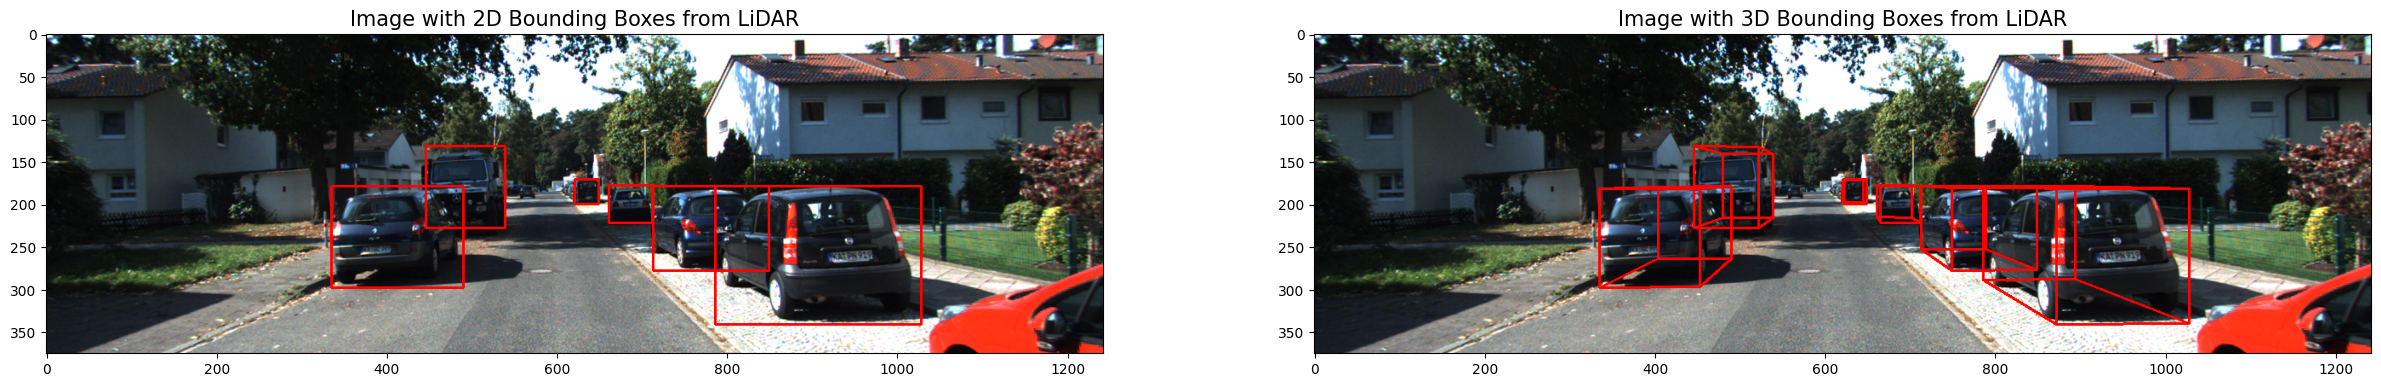

In [24]:
lidar2cam = LiDAR2Camera(calib_files[index])
lidar_2d, lidar_3d =lidar2cam.get_image_with_bboxes(image, list_of_3d_objects)

f,(ax1, ax2)= plt.subplots(1,2, figsize=(30,20))
ax1.imshow(lidar_2d)
ax1.set_title('Image with 2D Bounding Boxes from LiDAR', fontsize=15)
ax2.imshow(lidar_3d)
ax2.set_title('Image with 3D Bounding Boxes from LiDAR', fontsize=15)

In [26]:
def run_obstacle_detection(img):
    """Detect objects and draw bounding boxes using YOLOv8."""
    # Perform object detection
    results = model(img)

    # Parse detection results
    annotated_frame = results[0].plot()  # Annotated image with bounding boxes

    # Extract bounding box coordinates, class IDs, and confidence scores
    pred_bboxes = []
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        conf = box.conf[0]
        cls_id = int(box.cls[0])
        pred_bboxes.append((x1, y1, x2, y2, cls_id, conf))

    return annotated_frame, pred_bboxes


In [27]:
res, pred_bboxes = run_obstacle_detection(lidar_2d)


0: 224x640 6 cars, 1 truck, 42.9ms
Speed: 2.8ms preprocess, 42.9ms inference, 12.8ms postprocess per image at shape (1, 3, 224, 640)


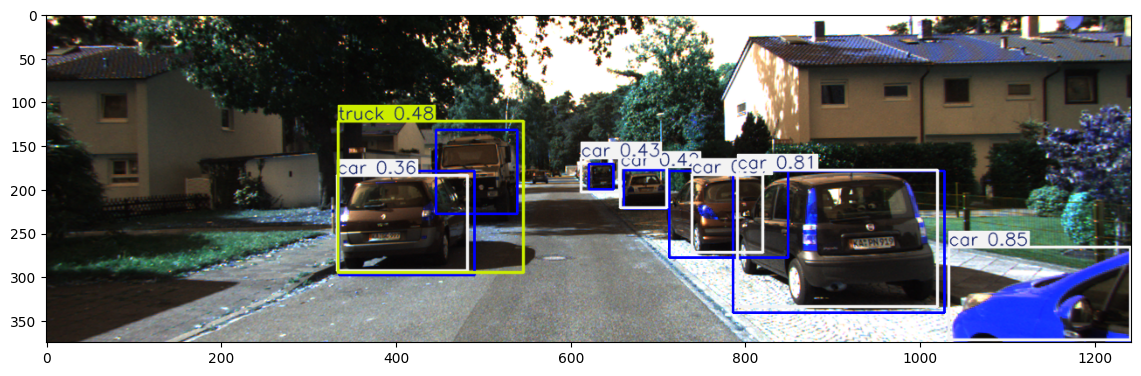

In [28]:
fig_fusion = plt.figure(figsize=(14, 7))
ax_fusion = fig_fusion.subplots()
ax_fusion.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
def box_iou(box1, box2):
    """
    Computer Intersection Over Union cost
    """
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1) #abs((box1[3] - box1[1])*(box1[2]- box1[0]))
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1) #abs((box2[3] - box2[1])*(box2[2]- box2[0]))
    union_area = (box1_area + box2_area) - inter_area

    # compute the IoU
    iou = inter_area/float(union_area)
    return iou

In [30]:
from scipy.optimize import linear_sum_assignment

def associate(lidar_boxes, camera_boxes):
    """
    LiDAR boxes will represent the red bounding boxes
    Camera will represent the other bounding boxes
    Function goal: Define a Hungarian Matrix with IOU as a metric and return, for each box, an id
    """
    # Define a new IOU Matrix nxm with old and new boxes
    iou_matrix = np.zeros((len(lidar_boxes),len(camera_boxes)),dtype=np.float32)

    # Go through boxes and store the IOU value for each box
    # You can also use the more challenging cost but still use IOU as a reference for convenience (use as a filter only)
    for i,lidar_box in enumerate(lidar_boxes):
        for j,camera_box in enumerate(camera_boxes):
            iou_matrix[i][j] = box_iou(lidar_box, camera_box)

    # Call for the Hungarian Algorithm
    hungarian_row, hungarian_col = linear_sum_assignment(-iou_matrix)
    hungarian_matrix = np.array(list(zip(hungarian_row, hungarian_col)))

    # Create new unmatched lists for old and new boxes
    matches, unmatched_camera_boxes, unmatched_lidar_boxes = [], [], []

    # Go through the Hungarian Matrix, if matched element has IOU < threshold (0.3), add it to the unmatched
    # Else: add the match
    for h in hungarian_matrix:
        if(iou_matrix[h[0],h[1]]>0.4):
            matches.append(h.reshape(1,2))

    if(len(matches)==0):
        matches = np.empty((0,2),dtype=int)
    else:
        matches = np.concatenate(matches,axis=0)

    return matches

In [32]:
class Object2D:
    def __init__(self, box, w, h):
        """
        Initialize 2D object properties based on bounding box.
        :param box: Tuple containing (xmin, ymin, xmax, ymax, class_id, confidence).
        :param w: Width of the image.
        :param h: Height of the image.
        """
        self.xmin = int(box[0])  # xmin (already absolute in YOLOv8 output)
        self.ymin = int(box[1])  # ymin
        self.xmax = int(box[2])  # xmax
        self.ymax = int(box[3])  # ymax
        self.category = int(box[4])  # Class ID
        self.confidence = box[5]  # Confidence score
        self.bbox = np.array([self.xmin, self.ymin, self.xmax, self.ymax])

In [33]:

def fill_2D_obstacles(result_shape, pred_bboxes):
    """
    Convert raw predictions into structured Object2D instances.
    :param result_shape: Tuple (height, width) of the image.
    :param pred_bboxes: List of bounding boxes [(xmin, ymin, xmax, ymax, class_id, confidence)].
    :return: List of Object2D instances.
    """
    h, w = result_shape[:2]
    return [Object2D(box, w, h) for box in pred_bboxes]

In [34]:
list_of_2d_objects = fill_2D_obstacles(res.shape, pred_bboxes)

In [35]:
# Access details of detected objects
for obj in list_of_2d_objects:
    print(f"Class: {obj.category}, Confidence: {obj.confidence}, BBox: {obj.bbox}")

Class: 2, Confidence: 0.8481590151786804, BBox: [1033  266 1241  372]
Class: 2, Confidence: 0.8103262186050415, BBox: [ 791  178 1020  334]
Class: 2, Confidence: 0.5729400515556335, BBox: [739 183 820 272]
Class: 7, Confidence: 0.47586363554000854, BBox: [334 122 546 295]
Class: 2, Confidence: 0.4258824288845062, BBox: [612 164 656 203]
Class: 2, Confidence: 0.42338326573371887, BBox: [657 175 710 221]
Class: 2, Confidence: 0.36285629868507385, BBox: [333 184 482 293]


In [36]:
lidar_boxes = [obs.bbox2d for obs in list_of_3d_objects] # Simply get the boxes
camera_boxes = [obs.bbox for obs in list_of_2d_objects]
matches = associate(lidar_boxes, camera_boxes)

print(matches)

[[0 6]
 [1 1]
 [2 2]
 [4 5]
 [5 4]]


In [40]:
class FusedObject:
    def __init__(self, bbox2d, bbox3d, category, t, confidence):
        """
        Initialize a fused object combining 2D and 3D information.
        """
        self.bbox2d = bbox2d
        self.bbox3d = bbox3d
        self.category = category
        self.t = t
        # Dynamically retrieve class names from YOLOv8 model
        self.class_ = model.names[category]  # `model.names` stores class names in YOLOv8
        self.confidence = confidence

In [41]:
def build_fused_object(list_of_2d_objects, list_of_3d_objects, matches, image):
    """
    Fuse 2D and 3D bounding boxes, annotate the image with class and distance information.
    """
    final_image = image.copy()
    list_of_fused_objects = []

    for match in matches:
        fused_object = FusedObject(
            list_of_2d_objects[match[1]].bbox,
            list_of_3d_objects[match[0]].bbox3d,
            list_of_2d_objects[match[1]].category,
            list_of_3d_objects[match[0]].t,
            list_of_2d_objects[match[1]].confidence,
        )
        # Draw distance and class on the image
        cv2.putText(
            final_image,
            '{0:.2f} m'.format(fused_object.t[2]),
            (int(fused_object.bbox2d[0]), int(fused_object.bbox2d[1])),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.75,
            (200, 200, 100),
            3,
            cv2.LINE_AA
        )
        cv2.putText(
            final_image,
            fused_object.class_,
            (int(fused_object.bbox2d[0] + 30), int(fused_object.bbox2d[1] + 30)),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.75,
            (200, 200, 100),
            3,
            cv2.LINE_AA
        )
        list_of_fused_objects.append(fused_object)

    return final_image, list_of_fused_objects

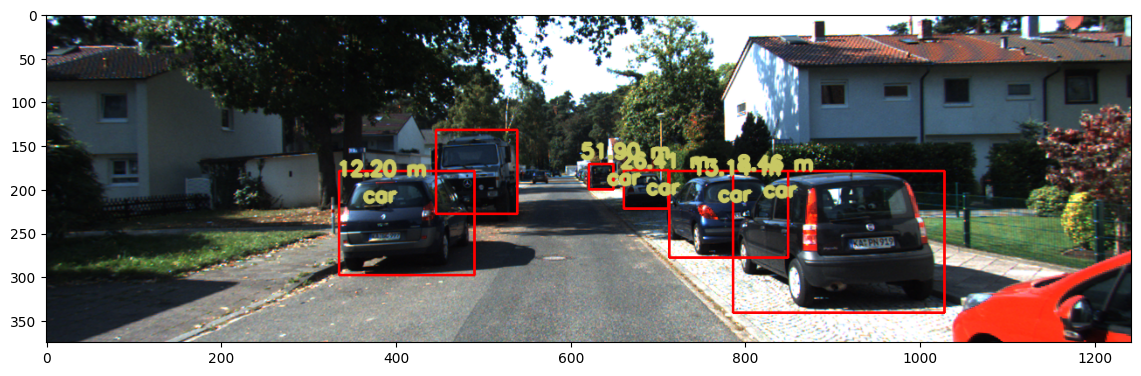

In [42]:
final_image, _ = build_fused_object(list_of_2d_objects, list_of_3d_objects, matches, lidar_2d)

plt.figure(figsize=(14,7))
plt.imshow(final_image)
plt.show()